In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_excel("walmart.xlsx")

In [26]:
df.head()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  8399 non-null   object        
 1   Customer Age          7496 non-null   float64       
 2   Customer Name         8399 non-null   object        
 3   Customer Segment      8399 non-null   object        
 4   Discount              8399 non-null   float64       
 5   Number of Records     8399 non-null   int64         
 6   Order Date            8399 non-null   datetime64[ns]
 7   Order ID              8399 non-null   int64         
 8   Order Priority        8399 non-null   object        
 9   Order Quantity        8399 non-null   int64         
 10  Product Base Margin   8336 non-null   float64       
 11  Product Category      8399 non-null   object        
 12  Product Container     8399 non-null   object        
 13  Product Name      

## Data Preprocessing

In [29]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [30]:
# Add a 'Promotional Period' column based on Discount        --------1
df['Promotional Period'] = df['Discount'] > 0

In [31]:
# Add a derived column for Average Selling Price            --------2
# Handle division by zero in case of missing or zero quantity
df['Avg Selling Price'] = df['Sales'] / df['Order Quantity']
df['Avg Selling Price'] = df['Avg Selling Price'].fillna(0)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  8399 non-null   object        
 1   Customer Age          7496 non-null   float64       
 2   Customer Name         8399 non-null   object        
 3   Customer Segment      8399 non-null   object        
 4   Discount              8399 non-null   float64       
 5   Number of Records     8399 non-null   int64         
 6   Order Date            8399 non-null   datetime64[ns]
 7   Order ID              8399 non-null   int64         
 8   Order Priority        8399 non-null   object        
 9   Order Quantity        8399 non-null   int64         
 10  Product Base Margin   8336 non-null   float64       
 11  Product Category      8399 non-null   object        
 12  Product Container     8399 non-null   object        
 13  Product Name      

In [33]:
df.tail()

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order Date,Order ID,Order Priority,Order Quantity,...,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code,Promotional Period,Avg Selling Price
8394,Fairfield,95.0,Tony Molinari,Corporate,0.10,1,2015-12-30,50950,Not Specified,35,...,7142,448.10,2015-12-30,Express Air,4.51,California,13.48,94533,True,12.802857
8395,Harker Heights,95.0,Matt Hagelstein,Home Office,0.09,1,2015-12-30,25542,Low,37,...,3583,257.46,2015-12-30,Express Air,4.23,Texas,7.28,76543,True,6.958378
8396,Riverview,95.0,Theresa Swint,Consumer,0.10,1,2015-12-30,45127,Medium,10,...,6361,14.15,2015-12-30,Regular Air,0.70,Florida,1.48,33569,True,1.415000
8397,Nicholasville,95.0,Maribeth Yedwab,Home Office,0.09,1,2015-12-30,49344,Low,1,...,6916,803.33,2015-12-30,Regular Air,24.49,Kentucky,832.81,40356,True,803.330000
8398,Nicholasville,95.0,Maribeth Yedwab,Home Office,0.00,1,2015-12-30,49344,Low,31,...,6915,672.93,2015-12-30,Regular Air,4.00,Kentucky,19.98,40356,False,21.707419


## Task 1: Promotion Effectiveness

In [34]:
# Aggregate sales during promotional and non-promotional periods
promo_effectiveness = df.groupby('Promotional Period').agg({'Sales': 'sum'}).reset_index()

In [35]:
promo_effectiveness

,Promotional Period,Sales
0,False,1.493748e+06
1,True,1.342185e+07


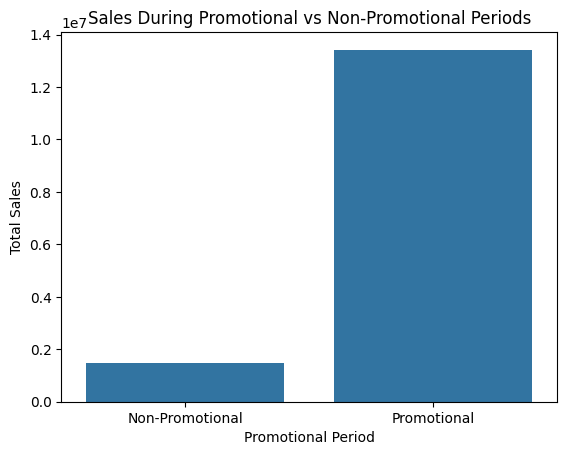

In [36]:
# Plot promotional vs. non-promotional sales
sns.barplot(x='Promotional Period', y='Sales', data=promo_effectiveness)
plt.title('Sales During Promotional vs Non-Promotional Periods')
plt.ylabel('Total Sales')
plt.xlabel('Promotional Period')
plt.xticks([0, 1], ['Non-Promotional', 'Promotional'])
plt.show()

In [65]:
promo_data = df[df['Promotional Period'] == True].groupby('Order Date')['Sales'].sum()
promo_data.info

<bound method Series.info of Order Date
2012-01-01     1052.8400
2012-01-02     9862.8100
2012-01-03    31101.3655
2012-01-04     1254.2500
2012-01-05    34095.2740
                 ...    
2015-12-26       95.7100
2015-12-27    21119.5015
2015-12-28     2721.1800
2015-12-29    18874.4200
2015-12-30     2495.1200
Name: Sales, Length: 1404, dtype: float64>

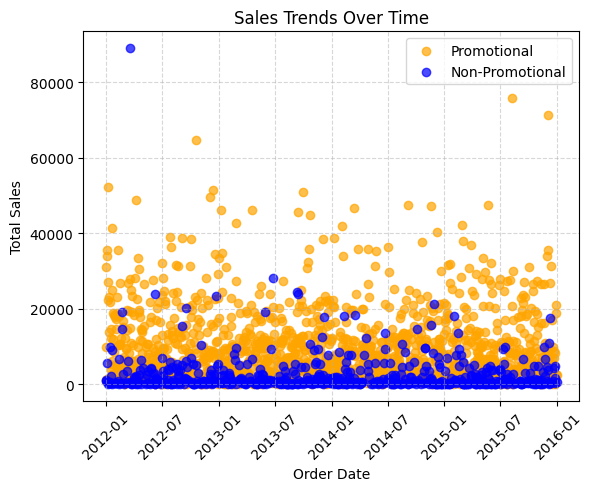

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate sales for promotional and non-promotional periods by date
promo_data = df[df['Promotional Period'] == True].groupby('Order Date')['Sales'].sum()
non_promo_data = df[df['Promotional Period'] == False].groupby('Order Date')['Sales'].sum()

# Plot the scatter plot for promotional and non-promotional sales
plt.scatter(promo_data.index, promo_data.values, label="Promotional", color="orange", alpha=0.7)
plt.scatter(non_promo_data.index, non_promo_data.values, label="Non-Promotional", color="blue", alpha=0.7)

# Customize the chart
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.title("Sales Trends Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()


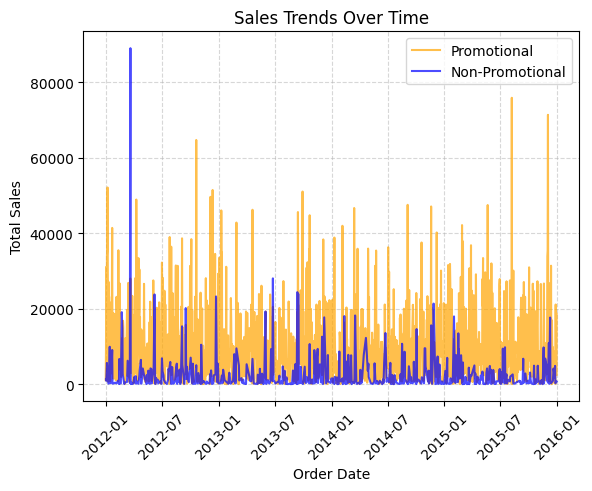

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate sales for promotional and non-promotional periods by date
promo_data = df[df['Promotional Period'] == True].groupby('Order Date')['Sales'].sum()
non_promo_data = df[df['Promotional Period'] == False].groupby('Order Date')['Sales'].sum()

# Plot the scatter plot for promotional and non-promotional sales
plt.plot(promo_data.index, promo_data.values, label="Promotional", color="orange", alpha=0.7)
plt.plot(non_promo_data.index, non_promo_data.values, label="Non-Promotional", color="blue", alpha=0.7)

# Customize the chart
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.title("Sales Trends Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the chart
plt.show()


## Task 2: Visual Comparisons

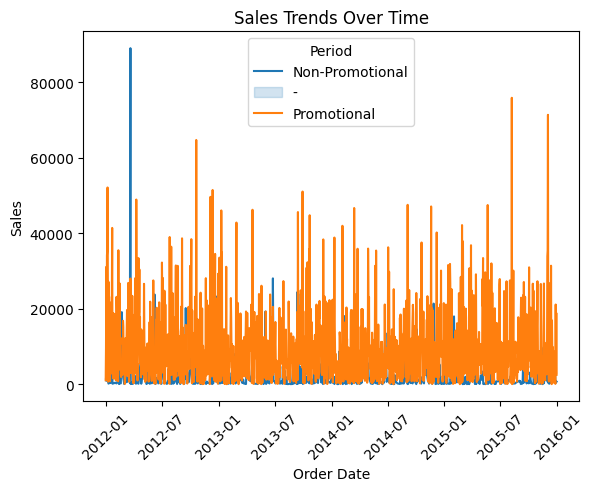

In [50]:
# Time-series analysis for promotional and non-promotional periods
promo_trends = df.groupby(['Order Date', 'Promotional Period']).agg({'Sales': 'sum'}).reset_index()
sns.lineplot(x='Order Date', y='Sales', hue='Promotional Period', data=promo_trends)
plt.title('Sales Trends Over Time')
plt.ylabel('Sales')
plt.xlabel('Order Date')
plt.xticks(rotation=45)
plt.legend(title='Period', labels=['Non-Promotional','-',"Promotional"])
plt.show()


In [40]:
promo_trends

,Order Date,Promotional Period,Sales
0,2012-01-01,True,1052.8400
1,2012-01-02,False,1239.0600
2,2012-01-02,True,9862.8100
3,2012-01-03,False,896.4900
4,2012-01-03,True,31101.3655
...,...,...,...
1996,2015-12-27,True,21119.5015
1997,2015-12-28,True,2721.1800
1998,2015-12-29,True,18874.4200
1999,2015-12-30,False,672.9300


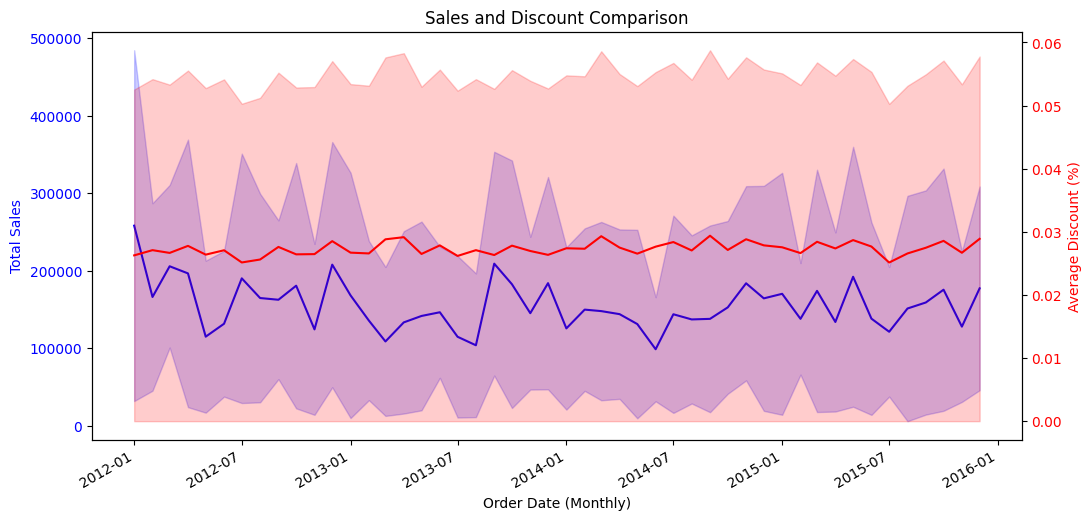

In [55]:
# Ensure 'monthly' is in datetime format for better control of axis
dual_axis_data['monthly'] = pd.to_datetime(dual_axis_data['monthly'].astype(str))

# Ensure 'total_sales' is numeric
dual_axis_data['total_sales'] = pd.to_numeric(dual_axis_data['total_sales'], errors='coerce')

# Drop any NaN values
dual_axis_data = dual_axis_data.dropna(subset=['total_sales', 'avg_discount'])

# Plotting dual-axis chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot sales
sns.lineplot(x='monthly', y='total_sales', data=dual_axis_data, ax=ax1, color='blue')
ax1.set_xlabel('Order Date (Monthly)')
ax1.set_ylabel('Total Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for the discount
ax2 = ax1.twinx()
sns.lineplot(x='monthly', y='avg_discount', data=dual_axis_data, ax=ax2, color='red')
ax2.set_ylabel('Average Discount (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Format x-axis for better date display
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
fig.autofmt_xdate()  # Automatically adjust date labels

plt.title('Sales and Discount Comparison')
plt.show()


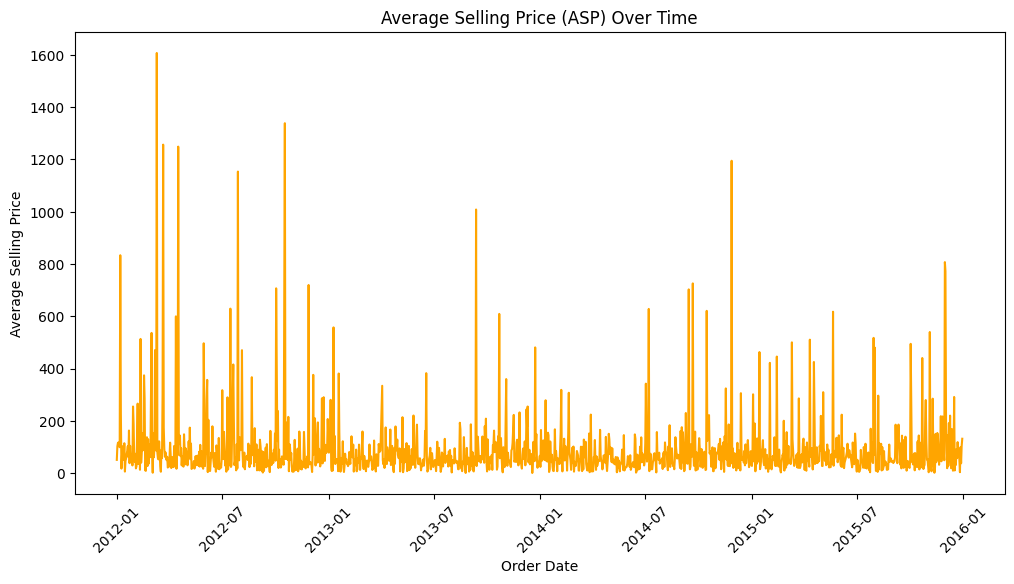

In [45]:
# Compute the Average Selling Price (ASP)
df['ASP'] = df['Sales'] / df['Order Quantity']

# Group by order date to track ASP over time
price_trends = df.groupby('Order Date').agg(
    avg_price=('ASP', 'mean')
).reset_index()

# Plot ASP over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='avg_price', data=price_trends, color='orange')
plt.title('Average Selling Price (ASP) Over Time')
plt.xlabel('Order Date')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  8399 non-null   object        
 1   Customer Age          7496 non-null   float64       
 2   Customer Name         8399 non-null   object        
 3   Customer Segment      8399 non-null   object        
 4   Discount              8399 non-null   float64       
 5   Number of Records     8399 non-null   int64         
 6   Order Date            8399 non-null   datetime64[ns]
 7   Order ID              8399 non-null   int64         
 8   Order Priority        8399 non-null   object        
 9   Order Quantity        8399 non-null   int64         
 10  Product Base Margin   8336 non-null   float64       
 11  Product Category      8399 non-null   object        
 12  Product Container     8399 non-null   object        
 13  Product Name      